# 6.2 Exploring relationships

## This script contains the following:

## 1. Importing Visualization Libraries and Data

## 2. Data Cleaning

## 3. Exploring Relationships

### 1. Importing Libraries and Data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy

In [2]:
# Create path

path = r'C:\Users\Frederick\Documents\17-12-2023 World University Rankings'

In [3]:
# Checking matplotlib version

matplotlib.__version__

'3.7.2'

In [4]:
# Import data for time ranking

the = pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'times.csv'), index_col = False)

In [5]:
# Import data for shanghai ranking

shanghai = pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'shanghai.csv'), index_col = False)

In [6]:
# Import data for cwur ranking

cwur = pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'cwur.csv'), index_col = False)

In [7]:
# Import data for attainment

attainment = pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'attainment.csv'), index_col = False)

In [8]:
# Import data for expenditure

expenditure = pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'expenditure.csv'), index_col = False)

In [9]:
# Import data for school_country

country = pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'school_country.csv'), index_col = False)

### 2. Data Cleaning

#### Renaming Columns

In [10]:
# Checking shape for times ranking dataframe

the.shape

(2603, 14)

In [11]:
# Checking column names for times ranking dataframe

the.columns

Index(['Unnamed: 0', 'world_rank', 'university_name', 'country', 'teaching',
       'international', 'research', 'citations', 'income', 'total_score',
       'num_students', 'student_staff_ratio', 'international_students',
       'year'],
      dtype='object')

#### Select the five categories Time ranking is using for their rank system - teaching (30%), reserach (30%), citations (32.5%), international mix (5%), industry income (2.5%) and total score. 

In [12]:
# Rename column total_score with shorter name

the.rename(columns = {'total_score': 'scores'}, inplace = True)

In [13]:
# Create a subset for Times ranking with only total score and the five categories 

the_sub = the[['teaching', 'international', 'research','citations', 'income', 'scores']]

In [14]:
# Checking datatype of subset

the_sub.dtypes

teaching         float64
international    float64
research         float64
citations        float64
income           float64
scores           float64
dtype: object

In [15]:
# Checking shape for shanghai ranking dataframe

shanghai.shape

(4896, 12)

In [16]:
# Checking column names for shanghai ranking dataframe

shanghai.columns

Index(['Unnamed: 0', 'world_rank', 'university_name', 'national_rank',
       'total_score', 'alumni', 'award', 'cited_research', 'articles',
       'science_citation', 'capita', 'year'],
      dtype='object')

#### Select the six categories shanghai ranking is using for their rank system - alumni (10%), staff (20%), citations (20%), published (20%), indexed (20%), capita (10%) and total score.¶

In [17]:
# Renaming column names

shanghai.rename(columns = {'total_score' : 'scores', 'alumni' : 'alumni award', 'award' : 'staff award', 'cited_research' : 'citations', 'articles' : 'papers published', 'science_citation' : 'papers indexed'}, inplace = True)

In [18]:
# Create a subset for Shanghai ranking with only total score and the six categories 

shanghai_sub = shanghai[['alumni award', 'staff award', 'citations', 'papers published', 'papers indexed','capita', 'scores']]

In [19]:
# Checking datatype of subset

shanghai_sub.dtypes

alumni award        float64
staff award         float64
citations           float64
papers published    float64
papers indexed      float64
capita              float64
scores              float64
dtype: object

In [20]:
# Checking shape for cwur ranking dataframe

cwur.shape

(2200, 15)

In [21]:
# Checking column names for cwur ranking dataframe

cwur.columns

Index(['Unnamed: 0', 'world_rank', 'university_name', 'country',
       'national_rank', 'quality_of_education', 'alumni_employment',
       'quality_of_faculty', 'publications', 'influence', 'citations',
       'broad_impact', 'patents', 'score', 'year'],
      dtype='object')

#### Select the seven categories CWUR ranking is using for their rank system - alumni awards(quality of education) (25%), alumni employment (25%), staff awards (quality of faculty) (25), publications (5%), influence (5%), citations (5%), broad impact (5%), patents (5%) and total score.¶

In [22]:
# Renaming column names

cwur.rename(columns = {'quality_of_education' : 'alumni award', 'alumni_employment' : 'alumni employment', 'quality_of_faculty' : 'staff award', 'broad_impact' : 'broad impact', 'score' : 'scores'}, inplace = True)

In [23]:
# Create a subset for cwur ranking with only total score and the seven categories 

cwur_sub = cwur[['alumni award', 'alumni employment', 'staff award', 'publications', 'influence', 'citations','broad impact', 'patents', 'scores']]

In [24]:
# Checking datatype of subset

cwur_sub.dtypes

alumni award           int64
alumni employment      int64
staff award            int64
publications           int64
influence              int64
citations              int64
broad impact         float64
patents                int64
scores               float64
dtype: object

#### Check missing values

In [25]:
# Checking for missing values in times ranking dataframe

the_sub.isnull().sum() # missing values in income, international and total scores

teaching            0
international       9
research            0
citations           0
income            218
scores           1402
dtype: int64

In [26]:
# Creating a list with missing total scores

the_nan = the[the['scores'].isnull() == True]

In [27]:
the_nan # Missing scores seems to be from university rank > 200, to exclude these missing scores/records

Unnamed: 0 world_rank                     university_name  \
400          400    201-225  Autonomous University of Barcelona   
401          401    201-225                  Bilkent University   
402          402    201-225                  Cardiff University   
403          403    201-225            Colorado School of Mines   
404          404    201-225                   Nagoya University   
...          ...        ...                                 ...   
2598        2598    601-800                 Yeungnam University   
2599        2599    601-800         Yıldız Technical University   
2600        2600    601-800            Yokohama City University   
2601        2601    601-800        Yokohama National University   
2602        2602    601-800                  Yuan Ze University   

                       country  teaching  international  research  citations  \
400                      Spain      33.7           45.9      27.9       57.9   
401                     Turkey      27.9           48.5      22.3       60.8   
402             United Kingdom      28.9           67.8      34.0       51.7   
403   United States of America      24.6           38.4      22.8       63.7   
404                      Japan      45.5           21.2      39.2       43.8   
...                        ...       ...            ...       ...        ...   
2598               South Korea      18.6           24.3      10.9       26.5   
2599                    Turkey      14.5           14.9       7.6       19.3   
2600                     Japan      24.0           16.1      10.2       36.4   
2601                     Japan      20.1           23.3      16.0       13.5   
2602                    Taiwan      16.2           17.7      18.3       28.6   

      income  scores  num_students  student_staff_ratio  \
400     37.0     NaN       30538.0                 12.3   
401     29.4     NaN           NaN                  NaN   
402     35.5     NaN       23347.0                 13.1   
403     99.4     NaN        5287.0                 18.2   
404     33.1     NaN       15529.0                  7.9   
...      ...     ...           ...                  ...   
2598    35.4     NaN       21958.0                 15.3   
2599    44.0     NaN       31268.0                 28.7   
2600    37.9     NaN        4122.0                  3.7   
2601    40.4     NaN       10117.0                 12.1   
2602    39.8     NaN        8663.0                 20.6   

     international_students  year  
400                     10%  2012  
401                     NaN  2012  
402                     23%  2012  
403                     12%  2012  
404                     10%  2012  
...                     ...   ...  
2598                     3%  2016  
2599                     2%  2016  
2600                     3%  2016  
2601                     8%  2016  
2602                     4%  2016  

[1402 rows x 14 columns]

In [28]:
# Creating a subset in the_sub without missing total scores

the_sub2 = the_sub[the_sub['scores'].isnull() == False]

In [29]:
# Checking for missing values in times ranking subset 

the_sub2.isnull().sum() # missing values in income and international

teaching           0
international      9
research           0
citations          0
income           140
scores             0
dtype: int64

In [30]:
# Checking for missing values in shanghai raking dataframe

shanghai_sub.isnull().sum() # missing values in scores, papers published, staff award, citations, papers indexed and capita

alumni award           0
staff award            1
citations              1
papers published      21
papers indexed         1
capita                 1
scores              3795
dtype: int64

In [31]:
# Creating a list with missing total scores in shanghai dataframe

shanghai_nan = shanghai[shanghai['scores'].isnull() == True]

In [32]:
shanghai_nan # Missing scores seems to be from university rank > 100, to exclude these missing scores/records

Unnamed: 0 world_rank                   university_name national_rank  \
100          100    101-152                 Aarhus University             2   
101          101    101-152  Arizona State University - Tempe         54-71   
102          102    101-152        Baylor College of Medicine         54-71   
103          103    101-152     Catholic University of Leuven           1-4   
104          104    101-152    Catholic University of Louvain           1-4   
...          ...        ...                               ...           ...   
4891        4892    401-500             University of Trieste         11-20   
4892        4893    401-500            University of Zaragoza          9-13   
4893        4894    401-500             Utah State University       126-146   
4894        4895    401-500   Vienna University of Technology           4-6   
4895        4896    401-500            Wake Forest University       126-146   

      scores  alumni award  staff award  citations  papers published  \
100      NaN          15.4         19.3        7.9              22.3   
101      NaN           0.0         14.4       20.8              26.3   
102      NaN           0.0          0.0       17.6              34.5   
103      NaN           0.0          0.0       19.2              16.0   
104      NaN          14.0         13.9       13.6               8.3   
...      ...           ...          ...        ...               ...   
4891     NaN           0.0          0.0        5.0              10.9   
4892     NaN           0.0          0.0        7.6               5.1   
4893     NaN          13.6          0.0        3.6              10.8   
4894     NaN           0.0          0.0        0.0              12.2   
4895     NaN           0.0          0.0       14.9               7.5   

      papers indexed  capita  year  
100             41.6    22.4  2005  
101             41.9    17.5  2005  
102             44.0    24.9  2005  
103             48.7    23.1  2005  
104             44.7    26.9  2005  
...              ...     ...   ...  
4891            25.1    20.1  2015  
4892            33.3    13.1  2015  
4893            25.1    15.5  2015  
4894            28.8    22.9  2015  
4895            25.0    11.9  2015  

[3795 rows x 12 columns]

In [33]:
# Creating a subset in shanghai_sub without missing total scores

shanghai_sub2 = shanghai_sub[shanghai_sub['scores'].isnull() == False]

In [34]:
# Checking for missing values in shanghai raking subset 
shanghai_sub2.isnull().sum() # No more missing values

alumni award        0
staff award         0
citations           0
papers published    0
papers indexed      0
capita              0
scores              0
dtype: int64

In [35]:
# Checking for missing values in cwur ranking dataframe

cwur_sub.isnull().sum() # missing values in broad impact 

alumni award           0
alumni employment      0
staff award            0
publications           0
influence              0
citations              0
broad impact         200
patents                0
scores                 0
dtype: int64

In [36]:
# Creating a list with missing broad impact

cwur_nan = cwur[cwur['broad impact'].isnull() == True]

In [37]:
cwur_nan # Missing scores seems to be from universities with various ranking

Unnamed: 0  world_rank                        university_name  \
0             0           1                     Harvard University   
1             1           2  Massachusetts Institute of Technology   
2             2           3                    Stanford University   
3             3           4                University of Cambridge   
4             4           5     California Institute of Technology   
..          ...         ...                                    ...   
195         195          96         Australian National University   
196         196          97                  University of Alberta   
197         197          98                 University of Helsinki   
198         198          99     Paris Diderot University - Paris 7   
199         199         100        Georgia Institute of Technology   

            country  national_rank  alumni award  alumni employment  \
0               USA              1             7                  9   
1               USA              2             9                 17   
2               USA              3            17                 11   
3    United Kingdom              1            10                 24   
4               USA              4             2                 29   
..              ...            ...           ...                ...   
195       Australia              2           101                101   
196          Canada              4           101                101   
197         Finland              1            69                101   
198          France              5            28                101   
199             USA             57           101                 85   

     staff award  publications  influence  citations  broad impact  patents  \
0              1             1          1          1           NaN        5   
1              3            12          4          4           NaN        1   
2              5             4          2          2           NaN       15   
3              4            16         16         11           NaN       50   
4              7            37         22         22           NaN       18   
..           ...           ...        ...        ...           ...      ...   
195           43           101        101        101           NaN      101   
196          101            68        101         92           NaN       81   
197           81            74         79         71           NaN      101   
198           72           101         87        101           NaN      101   
199          101            97        101         43           NaN       32   

     scores  year  
0    100.00  2012  
1     91.67  2012  
2     89.50  2012  
3     86.17  2012  
4     85.21  2012  
..      ...   ...  
195   44.50  2013  
196   44.50  2013  
197   44.39  2013  
198   44.36  2013  
199   44.26  2013  

[200 rows x 15 columns]

#### Check duplicates

In [38]:
# Find duplicates in times dataframe

the_dup = the_sub2[the_sub2.duplicated()]

In [39]:
the_dup # No dupclicates

Empty DataFrame
Columns: [teaching, international, research, citations, income, scores]
Index: []

In [40]:
# Find duplicates in shanghai dataframe

shanghai_dup = shanghai_sub2[shanghai_sub2.duplicated()]

In [41]:
shanghai_dup # No duplicates

Empty DataFrame
Columns: [alumni award, staff award, citations, papers published, papers indexed, capita, scores]
Index: []

In [42]:
# Find duplicates in cwur dataframe

cwur_dup = cwur_sub[cwur_sub.duplicated()]

In [43]:
cwur_dup # No duplicates

Empty DataFrame
Columns: [alumni award, alumni employment, staff award, publications, influence, citations, broad impact, patents, scores]
Index: []

#### Check mixed data type

In [44]:
# Checking mixed data type in times dataframe

for col in the_sub2.columns.tolist():
      weird = (the_sub2[[col]].applymap(type) != the_sub2[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (the_sub2[weird]) > 0:
        print (col)
        
# No mixed-type columns

C:\Users\Frederick\AppData\Local\Temp\ipykernel_6620\3799353386.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (the_sub2[[col]].applymap(type) != the_sub2[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Frederick\AppData\Local\Temp\ipykernel_6620\3799353386.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (the_sub2[[col]].applymap(type) != the_sub2[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Frederick\AppData\Local\Temp\ipykernel_6620\3799353386.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (the_sub2[[col]].applymap(type) != the_sub2[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Frederick\AppData\Local\Temp\ipykernel_6620\3799353386.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (the_sub2[[col]].applymap(type) != the_sub2[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users

In [45]:
# Checking mixed data type in shanghai dataframe

for col in shanghai_sub2.columns.tolist():
      weird = (shanghai_sub2[[col]].applymap(type) != shanghai_sub2[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (shanghai_sub2[weird]) > 0:
        print (col)
        
# No mixed-type columns

C:\Users\Frederick\AppData\Local\Temp\ipykernel_6620\641540680.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (shanghai_sub2[[col]].applymap(type) != shanghai_sub2[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Frederick\AppData\Local\Temp\ipykernel_6620\641540680.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (shanghai_sub2[[col]].applymap(type) != shanghai_sub2[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Frederick\AppData\Local\Temp\ipykernel_6620\641540680.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (shanghai_sub2[[col]].applymap(type) != shanghai_sub2[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Frederick\AppData\Local\Temp\ipykernel_6620\641540680.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (shanghai_sub2[[col]].applymap(type) != shanghai_sub2[[col]].iloc[0]

In [46]:
# Checking mixed data type in cwur dataframe

for col in cwur_sub.columns.tolist():
      weird = (cwur_sub[[col]].applymap(type) != cwur_sub[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (cwur_sub[weird]) > 0:
        print (col)
        
# No mixed-type columns

C:\Users\Frederick\AppData\Local\Temp\ipykernel_6620\849769834.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (cwur_sub[[col]].applymap(type) != cwur_sub[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Frederick\AppData\Local\Temp\ipykernel_6620\849769834.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (cwur_sub[[col]].applymap(type) != cwur_sub[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Frederick\AppData\Local\Temp\ipykernel_6620\849769834.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (cwur_sub[[col]].applymap(type) != cwur_sub[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Frederick\AppData\Local\Temp\ipykernel_6620\849769834.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (cwur_sub[[col]].applymap(type) != cwur_sub[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Fre

### 3. Exploring Relationships

#### Correlation Matrix

In [47]:
# Create a correlation matrix using pandas for times dataframe

the_sub2.corr()

teaching  international  research  citations    income  \
teaching       1.000000      -0.075483  0.892144   0.221300  0.256737   
international -0.075483       1.000000  0.029172   0.067386 -0.034168   
research       0.892144       0.029172  1.000000   0.190185  0.302848   
citations      0.221300       0.067386  0.190185   1.000000 -0.151668   
income         0.256737      -0.034168  0.302848  -0.151668  1.000000   
scores         0.894085       0.123829  0.904166   0.546015  0.226557   

                 scores  
teaching       0.894085  
international  0.123829  
research       0.904166  
citations      0.546015  
income         0.226557  
scores         1.000000

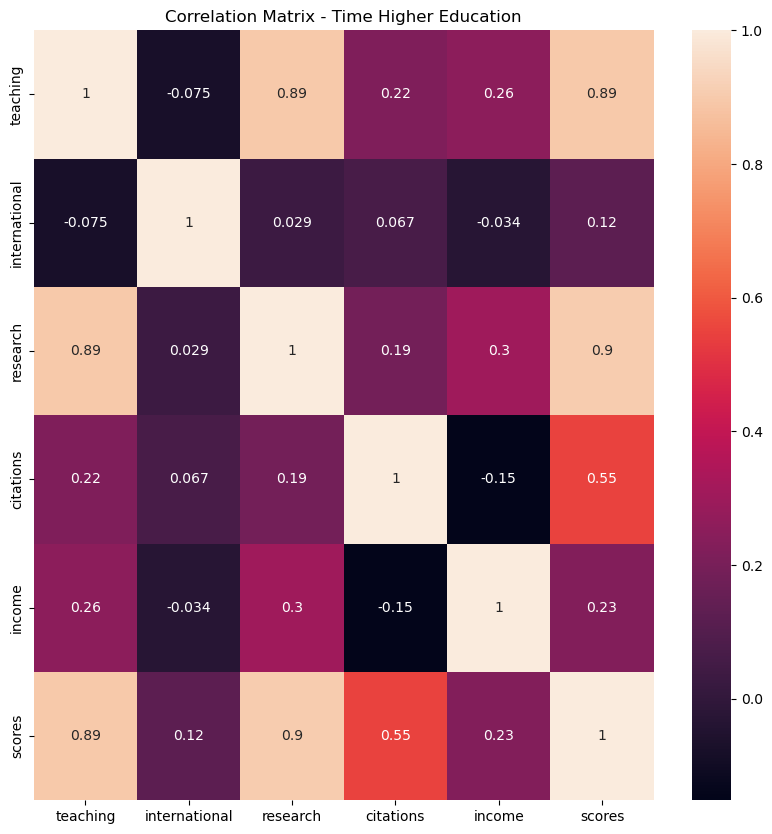

In [48]:
# Create a subplot with matplotlib

f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(the_sub2.corr(), annot = True, ax = ax).set(title='Correlation Matrix - Time Higher Education') 

#### With Times Higher Education ranking system, the total score connections between the variables are :-

#### Teaching: 0.89 cofficient indicates a strong positive correlation. The higher the teaching score, the higher the total score/ranking.

#### International: 0.12 coefficient indicates a weak positive correlation. The more international mix at the universities, the higher score/ranking.

#### Research: 0.9 coefficient indicates a strong positive correlation. The higher the research score, the higher the total score/ranking.

#### Citations: 0.55 cofficient indicates a moderate to strong positive correlation. The more citations, the higher the universities overall score/ranking. 

#### Income: 0.23 cofficient indicates a weak to moderate positive correlation. The higher the income, the higher the universities overall score/ranking. 

#### The above isn't surprising given the weigtings of the variables - international mix has the weighting of 5% and income has a weighting of 2.5%. 

In [49]:
# Create a correlation matrix using pandas for shanghai dataframe

shanghai_sub2.corr()

alumni award  staff award  citations  papers published  \
alumni award          1.000000     0.745999   0.480494          0.584310   
staff award           0.745999     1.000000   0.550183          0.671199   
citations             0.480494     0.550183   1.000000          0.874655   
papers published      0.584310     0.671199   0.874655          1.000000   
papers indexed        0.359647     0.197078   0.659382          0.626028   
capita                0.639318     0.718257   0.553548          0.674305   
scores                0.769191     0.831950   0.870980          0.929130   

                  papers indexed    capita    scores  
alumni award            0.359647  0.639318  0.769191  
staff award             0.197078  0.718257  0.831950  
citations               0.659382  0.553548  0.870980  
papers published        0.626028  0.674305  0.929130  
papers indexed          1.000000  0.220892  0.627578  
capita                  0.220892  1.000000  0.755265  
scores                  0.627578  0.755265  1.000000

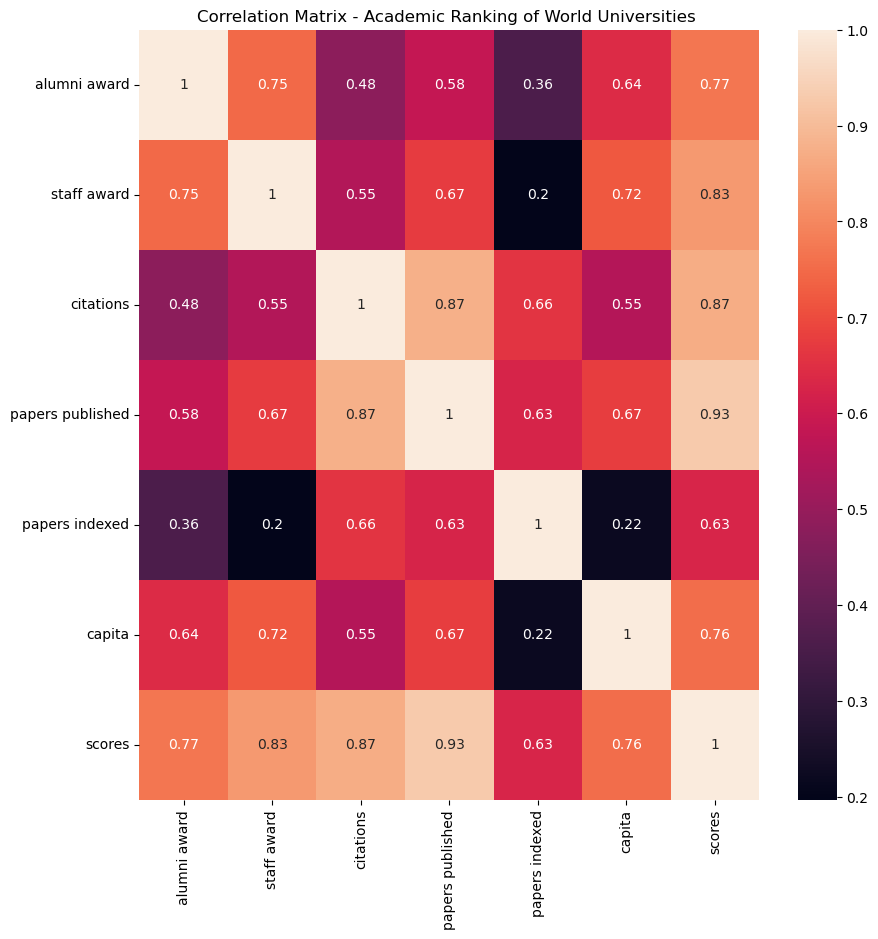

In [50]:
# Create a subplot with matplotlib

f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr2 = sns.heatmap(shanghai_sub2.corr(), annot = True, ax = ax).set(title='Correlation Matrix - Academic Ranking of World Universities ') 

#### With Shanghai ranking system, all the variables have a strong positive relationship with the total score. 

#### The strongest correction is papers published (0.93 coefficient), following by citations (0.87 coefficient) and staff awards (0.83 coefficient). 

#### Alumni (0.77 coeffiicient) and Capita (0.76 coefficient), although only contirbuting 10% each to the total score, also have a strong positive relationship with total score. 

#### The number of paper indexed had the lowest correlation but still considerably strong with 0.63 coefficient. 

In [51]:
# Create a correlation matrix using pandas for cwur dataframe

cwur_sub.corr()

alumni award  alumni employment  staff award  publications  \
alumni award           1.000000           0.606421     0.786181      0.624657   
alumni employment      0.606421           1.000000     0.558618      0.572096   
staff award            0.786181           0.558618     1.000000      0.634423   
publications           0.624657           0.572096     0.634423      1.000000   
influence              0.645641           0.527382     0.656406      0.874952   
citations              0.630455           0.559200     0.652186      0.829912   
broad impact           0.521615           0.423619     0.549345      0.917878   
patents                0.528120           0.528219     0.555107      0.671558   
scores                -0.600541          -0.510374    -0.693540     -0.522111   

                   influence  citations  broad impact   patents    scores  
alumni award        0.645641   0.630455      0.521615  0.528120 -0.600541  
alumni employment   0.527382   0.559200      0.423619  0.528219 -0.510374  
staff award         0.656406   0.652186      0.549345  0.555107 -0.693540  
publications        0.874952   0.829912      0.917878  0.671558 -0.522111  
influence           1.000000   0.845207      0.916040  0.611811 -0.522837  
citations           0.845207   1.000000      0.852638  0.598728 -0.522438  
broad impact        0.916040   0.852638      1.000000  0.562861 -0.531590  
patents             0.611811   0.598728      0.562861  1.000000 -0.474810  
scores             -0.522837  -0.522438     -0.531590 -0.474810  1.000000

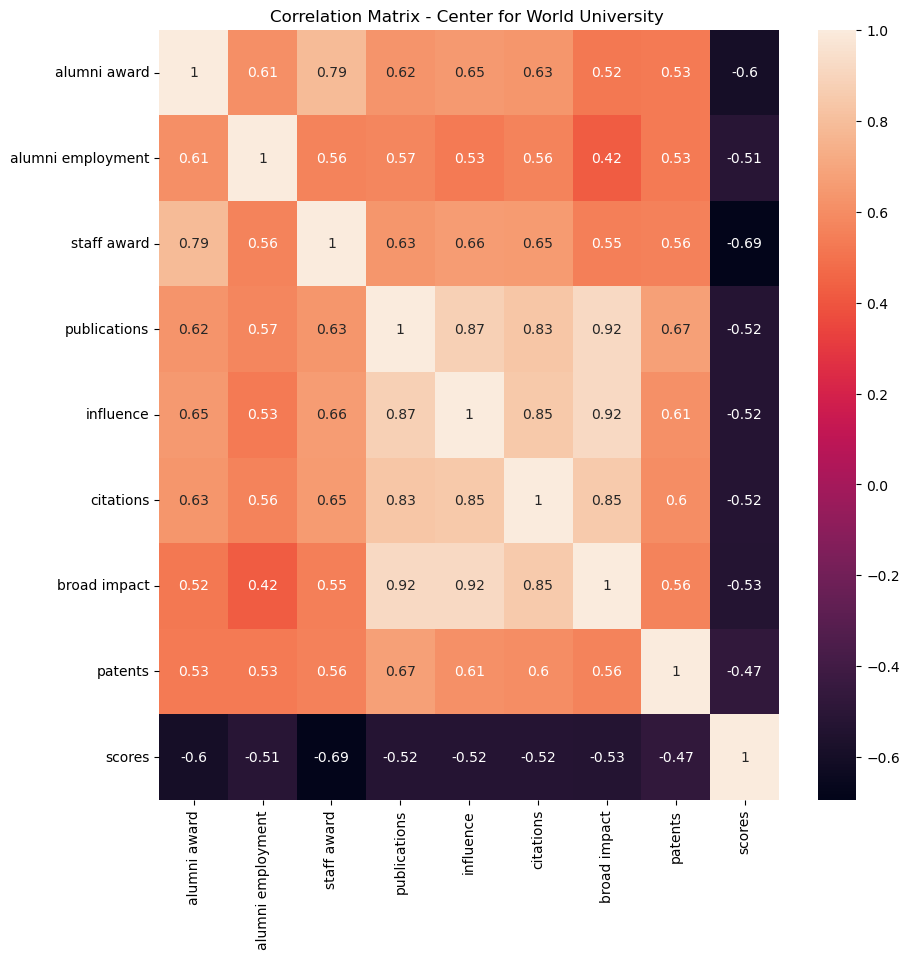

In [52]:
# Create a subplot with matplotlib

f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr3 = sns.heatmap(cwur_sub.corr(), annot = True, ax = ax).set(title='Correlation Matrix - Center for World University ') 

#### With CWUR ranking system, all the variables have strong negative relationships with the total score (except patent variable which had moderate negative relationship). The negative relationship is due to the different scale of measurement, the variables are measured by ranking (i.e. 1 being highest), whereas total score is the scoring system where 1 is lowest. 

#### The strongest were staff award (-0.69 coefficient) followed by alumni award (-0.6 coefficient). 

#### The rest of the variables all had pretty similar coefficient, ranging  from -0.47 to -0.53. 

#### Scatterplot

C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


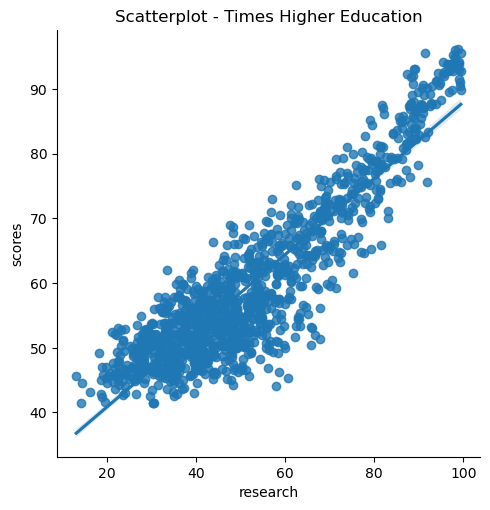

In [53]:
# Create a scatterplot for the 'research' and 'total scores' columns in seaborn

scatter1 = sns.lmplot(x = 'research', y = 'scores', data = the_sub2).set(title='Scatterplot - Times Higher Education')

#### From the scatterplot above, we can see that the data points gather nicely around the best fit line and there are no outliers. It is clear that the higher the research score, then the higher the total score/ranking of the university. There also seems to be a wider variance in the lower range (i.e. research score < 60). 

C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


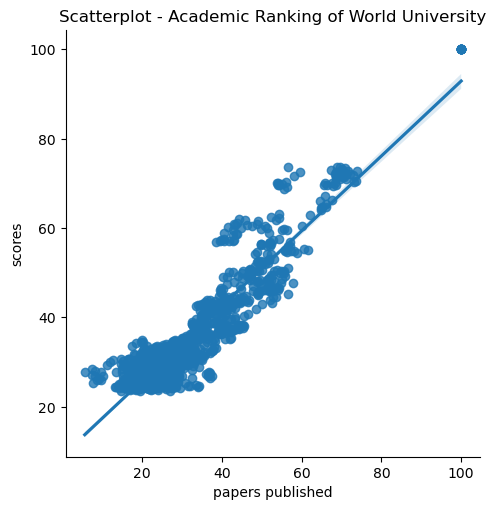

In [54]:
# Create a scatterplot for the 'paper published' and 'total scores' columns in seaborn

scatter2 = sns.lmplot(x = 'papers published', y = 'scores', data = shanghai_sub2).set(title='Scatterplot - Academic Ranking of World University')

#### From the Shanghai scatterplot above, we can see that the data points also gather nicely around the best fit line. Also, the data points seems to be in the range up to 80, with one exception at around 100, though still close enough to the best fit line and doesn't look like an outlier. 

C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


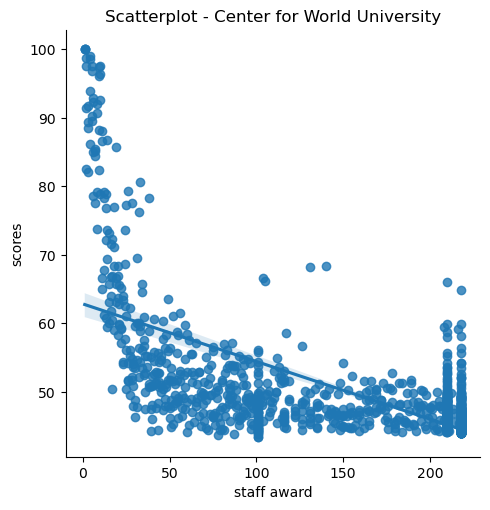

In [55]:
# Create a scatterplot for the 'staff award' and 'total scores' columns in seaborn for cwur dataframe

scatter3 = sns.lmplot(x = 'staff award', y = 'scores', data = cwur_sub).set(title='Scatterplot - Center for World University')

### From the cwur scatterplot above, we can see that there were many data points where higher ranking of staff awards indicates a higher overall score. However, the issue is likely the subset selected for analysis, as the ranking for staff award were up to 200, while sores were up to 100. Unlike Times and Shanghai dataset, we only selected the top 100 - 200, the cwur dataset included all rankings (up to 1000). Perhaps filtering and selected the top 100 would give a much different picture and stronger correlation with higher cofficient. 

#### Pair plots

C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


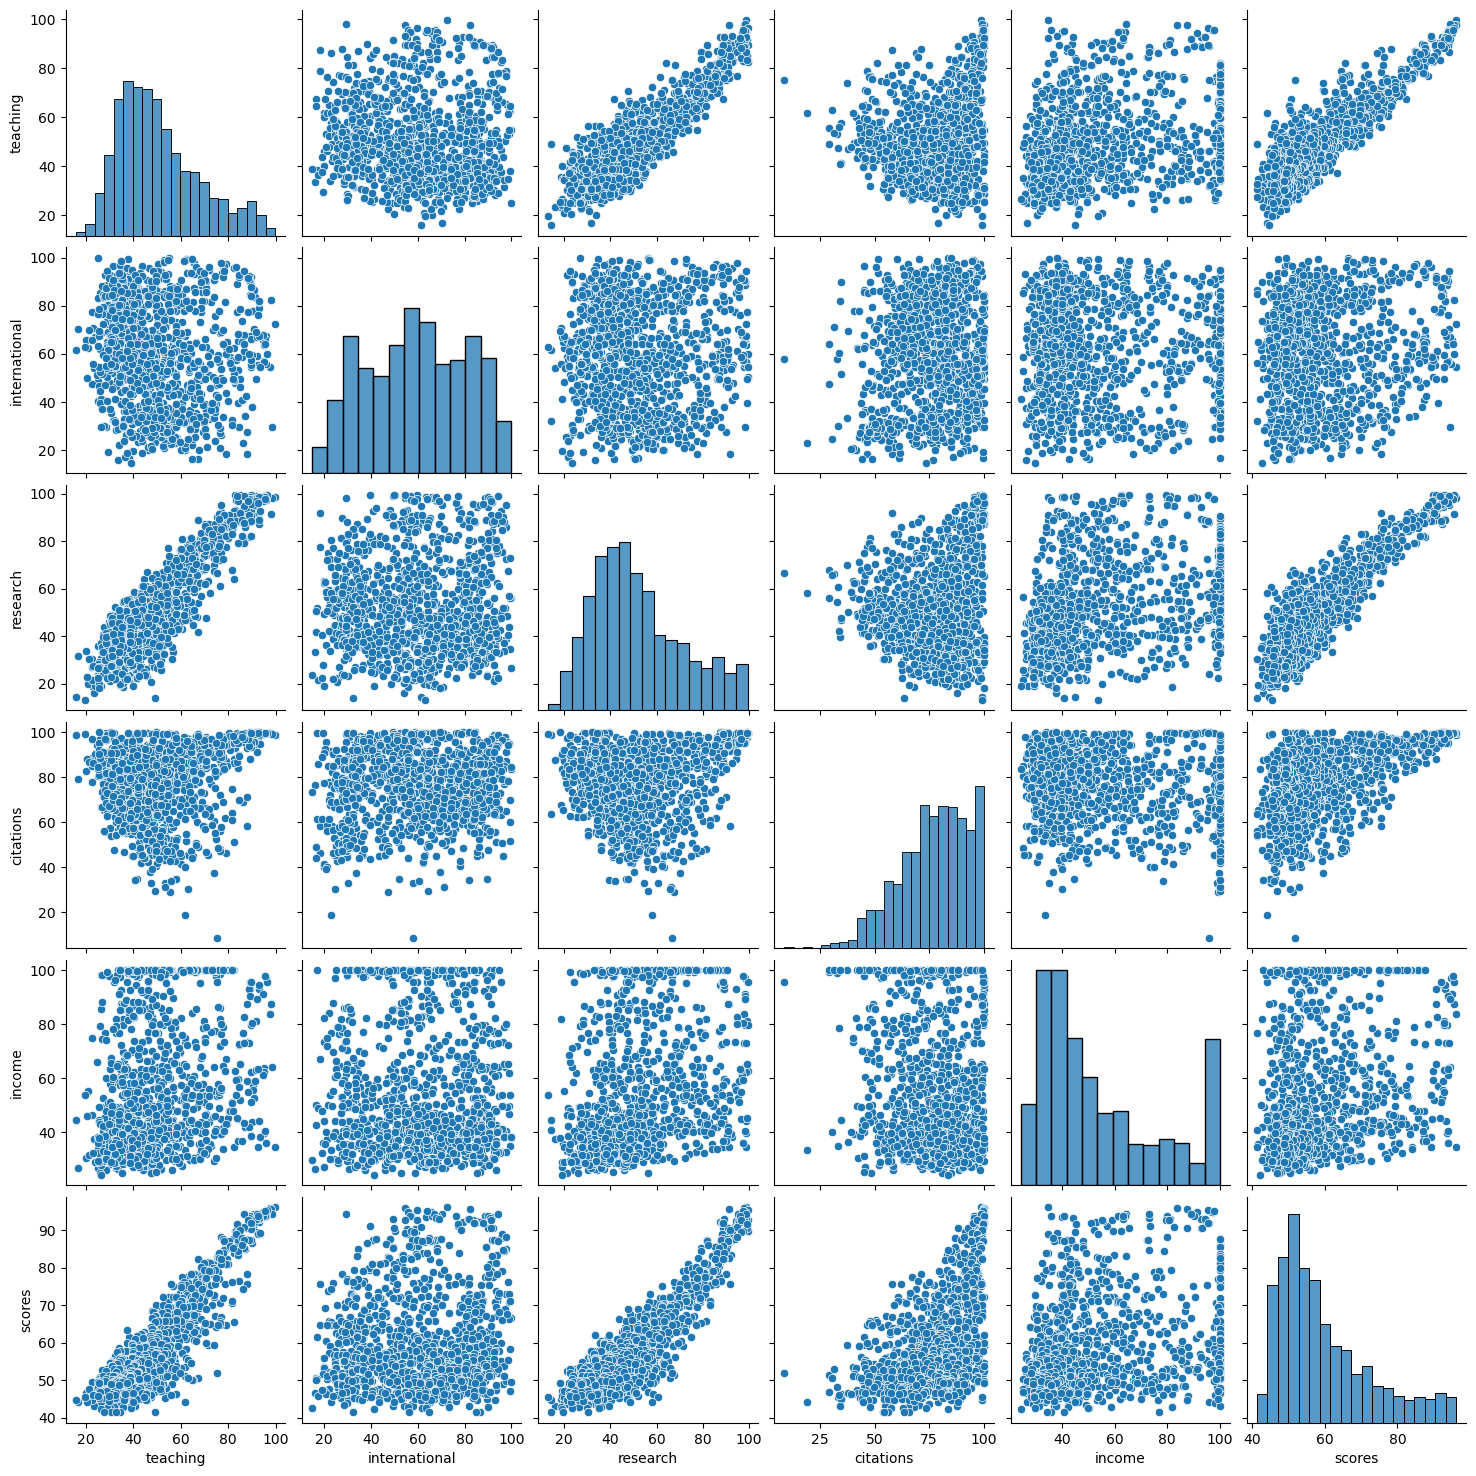

In [56]:
# Create a pair plot for times dataframe

g1 = sns.pairplot(the_sub2)

### Looking at the pair plot for times dataframe, it loos like the international and income variables have pretty much no relationships with other variables, as the data points were all scattered around the whole chart. The citations and total scores might be worth looking into further, as the relationship might be stronger than it looks. There seems to be a lot of citations with high scores but have low total score/ranking. 

C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

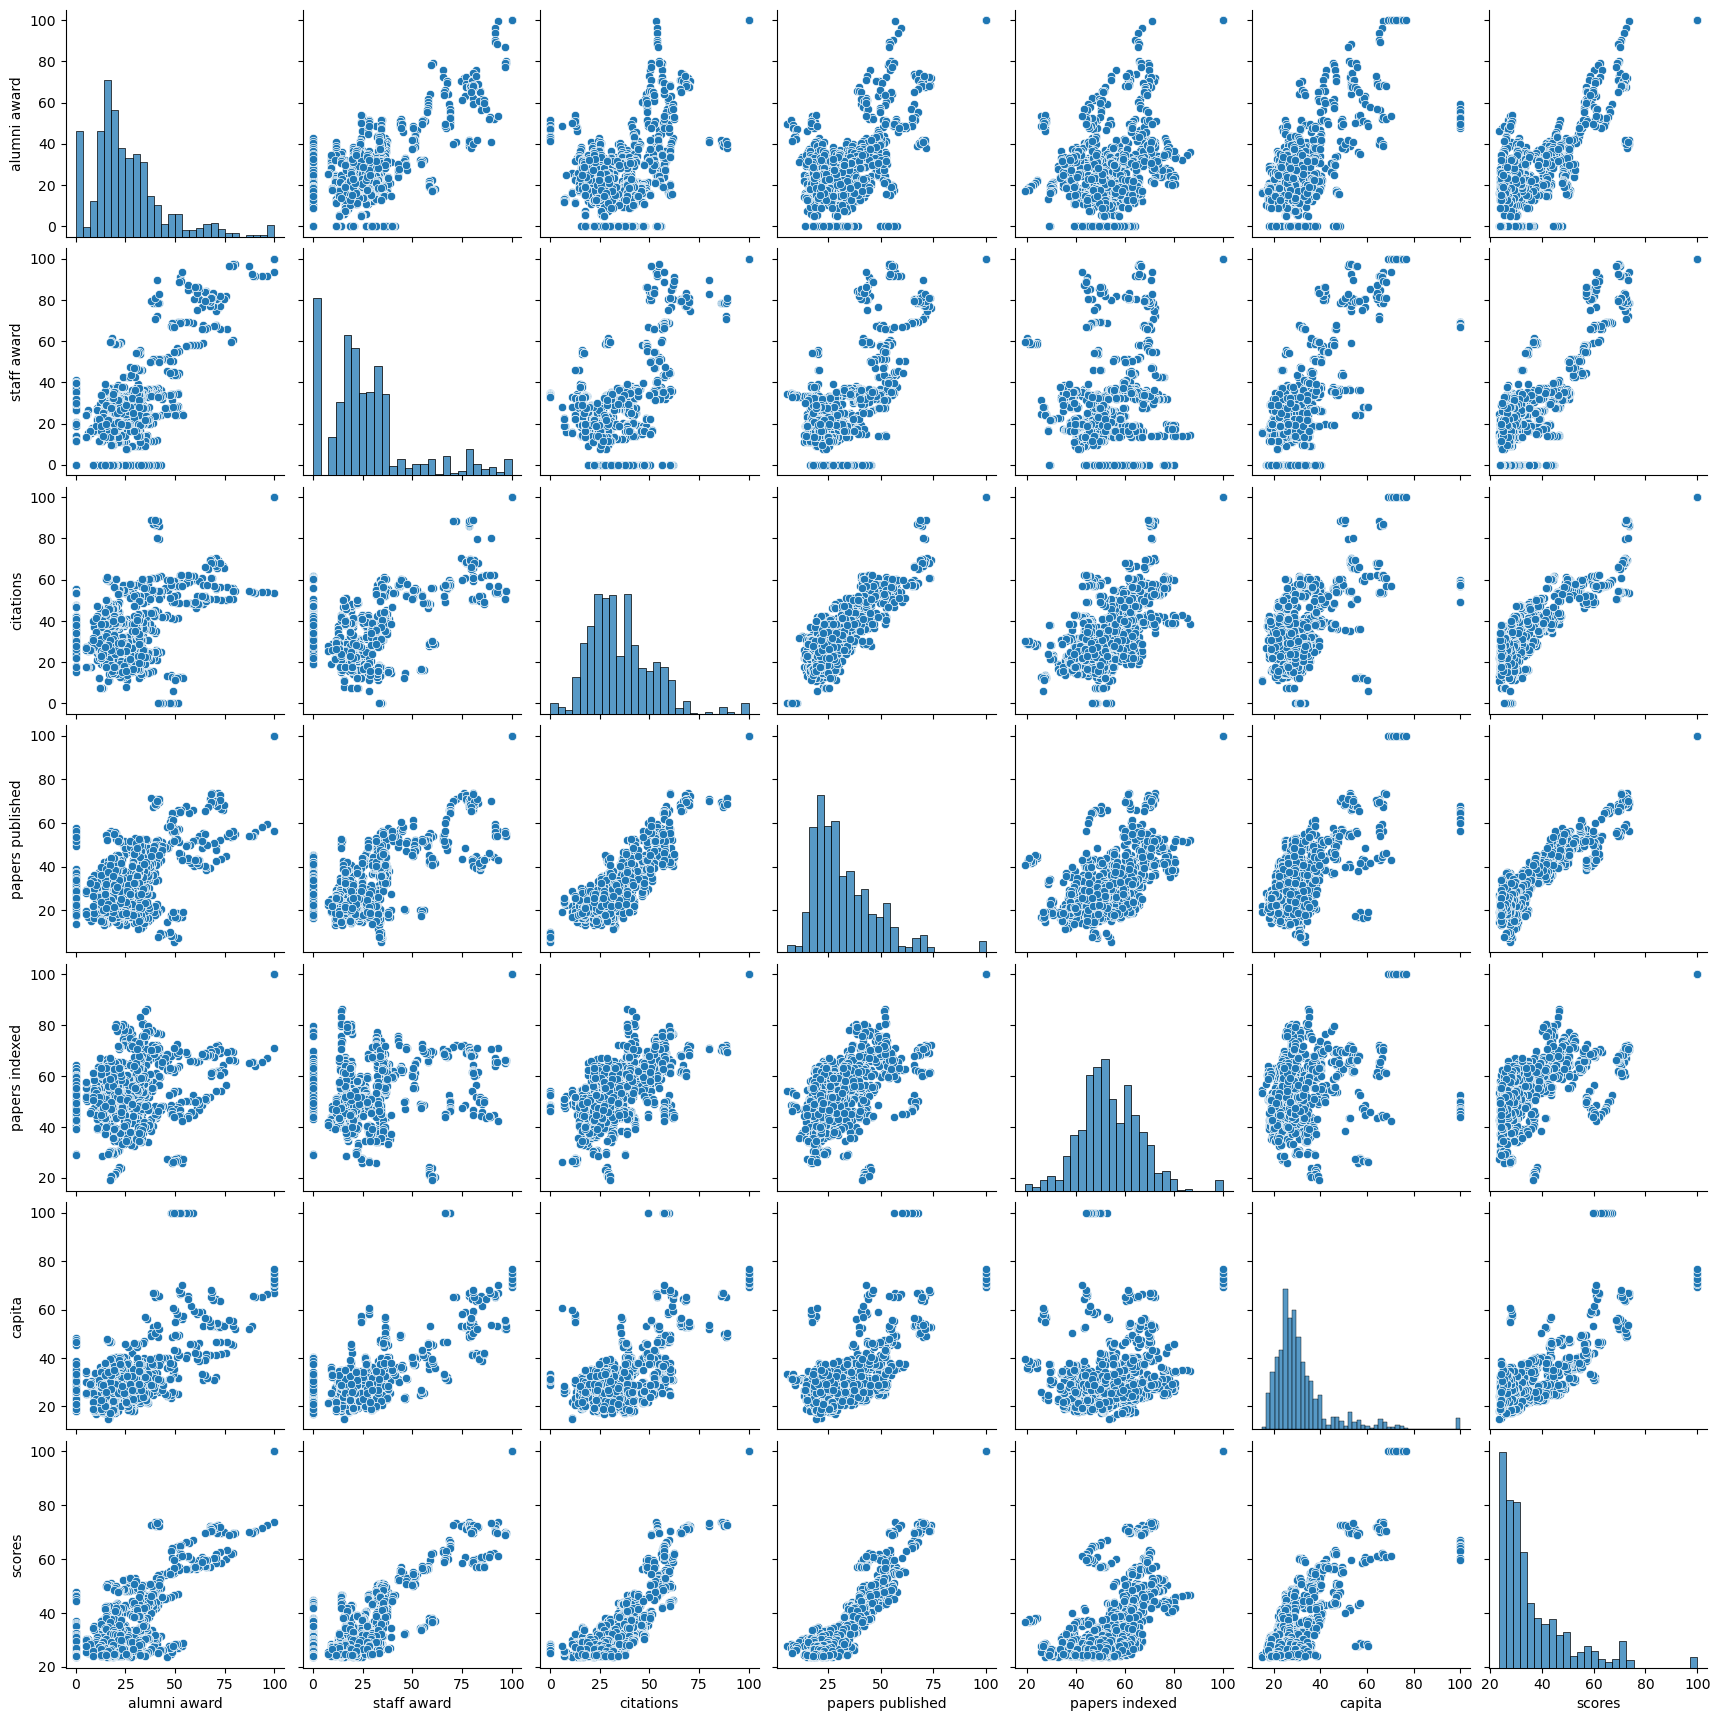

In [57]:
# Create a pair plot for shanghai dataframe

g2 = sns.pairplot(shanghai_sub2)

###  The pair plot from Shanghai dataframe shows that most of the scatterplots look very similar and clean. That said, the one data point of 100 were visible in all plots nad it might be worth taking a look, as well as the no data points between 80 to 90s, as shown by the scores histrogram as well. There are also a few data poins that appeared structured in the capita scatterplot.

C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

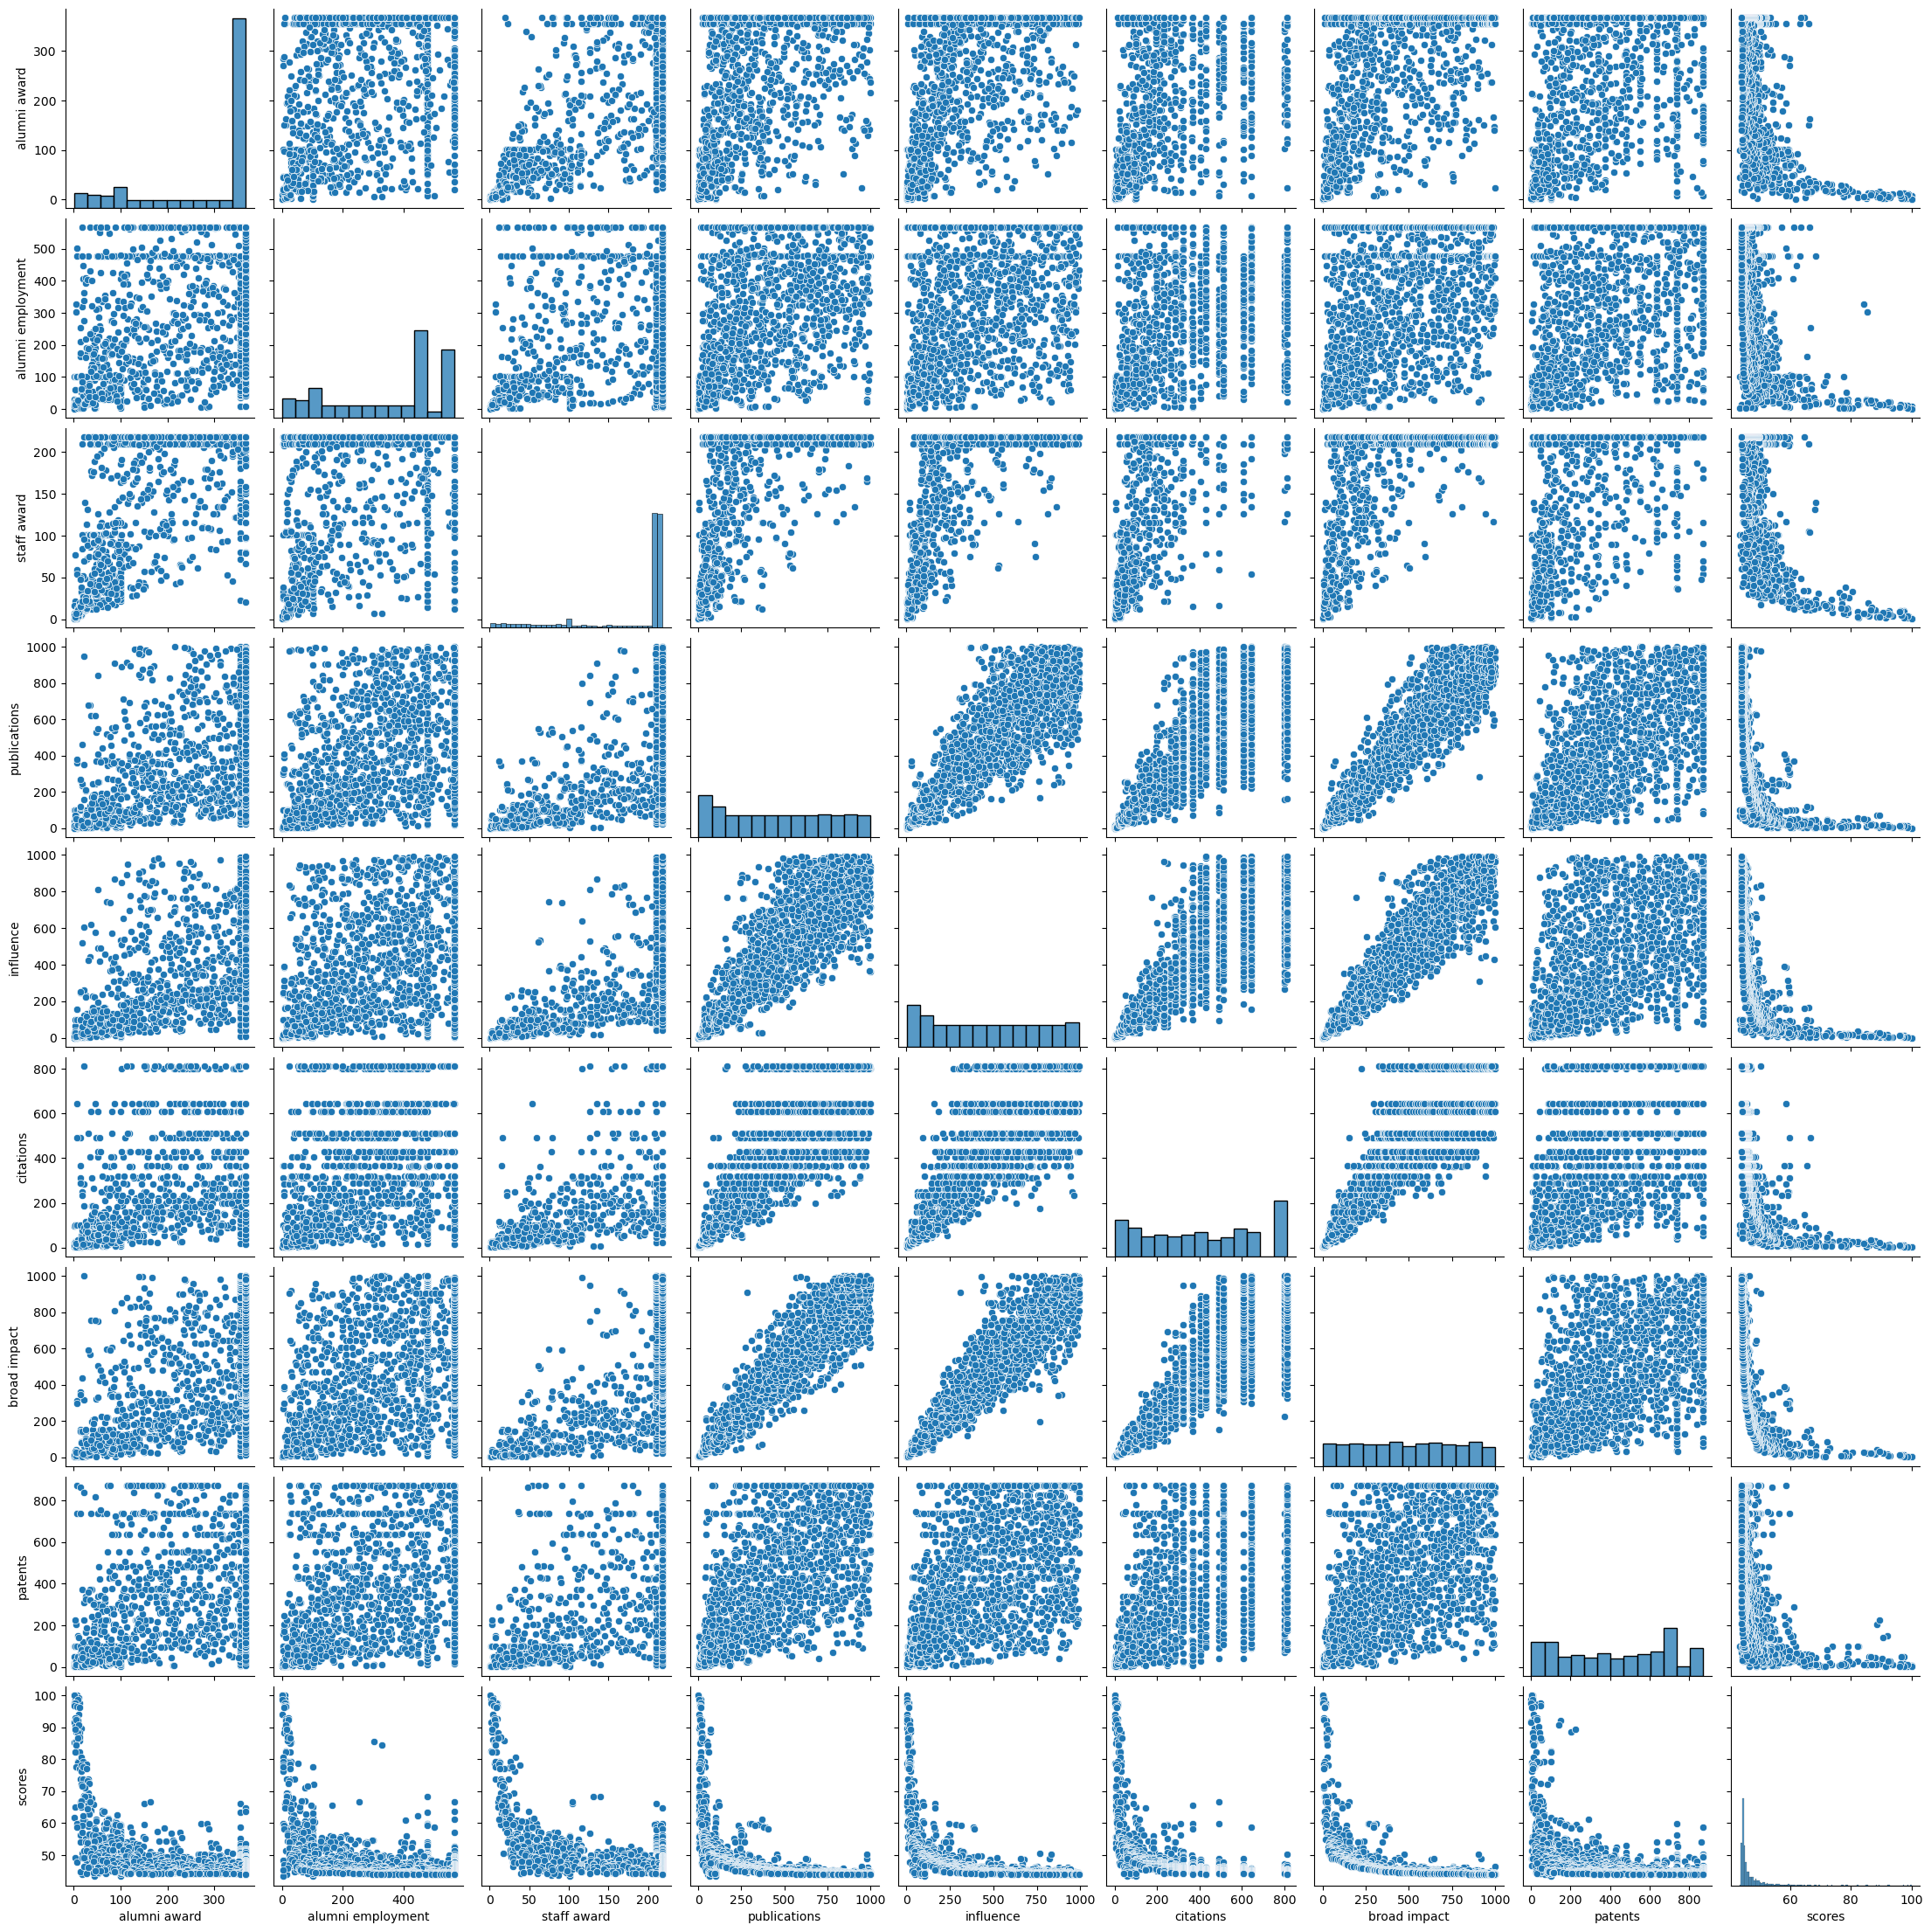

In [58]:
# Create a pair plot for cwur dataframe

g3 = sns.pairplot(cwur_sub)

### The cwur pair plot shows a pretty similar patter in the total scores axis, where all variables had data points that gathered in the higher rank, and then the rest of the data points gathered down at the bottom. Again this is likely due to the data selection. It would be worth selecting the top 100 or 200 university scores/ranking, and then run the relevant plots again to see whether the correlation coefficients change.

### Categorical Plots

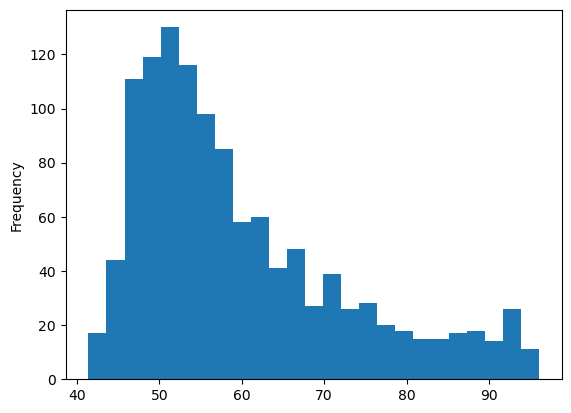

In [59]:
# Create histogram for total scores in times dataframe

hist1 = the_sub2['scores'].plot.hist(bins = 25)

In [60]:
# Creating score range conditions with loc - low scores

the_sub2.loc[the_sub2['scores'] < 50, 'score_range_loc'] = 'low scores'

C:\Users\Frederick\AppData\Local\Temp\ipykernel_6620\802786387.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_sub2.loc[the_sub2['scores'] < 50, 'score_range_loc'] = 'low scores'
C:\Users\Frederick\AppData\Local\Temp\ipykernel_6620\802786387.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'low scores' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  the_sub2.loc[the_sub2['scores'] < 50, 'score_range_loc'] = 'low scores'


In [61]:
# Creating score range conditions with loc - Mid scores

the_sub2.loc[(the_sub2['scores'] >= 50) & (the_sub2['scores'] <70), 'score_range_loc'] = 'mid scores'

In [62]:
# Creating score range conditions with loc - High scores

the_sub2.loc[the_sub2['scores'] >= 70, 'score_range_loc'] = 'high scores'

In [63]:
the_sub2['score_range_loc'].value_counts(dropna = False)

score_range_loc
mid scores     683
low scores     274
high scores    244
Name: count, dtype: int64

C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

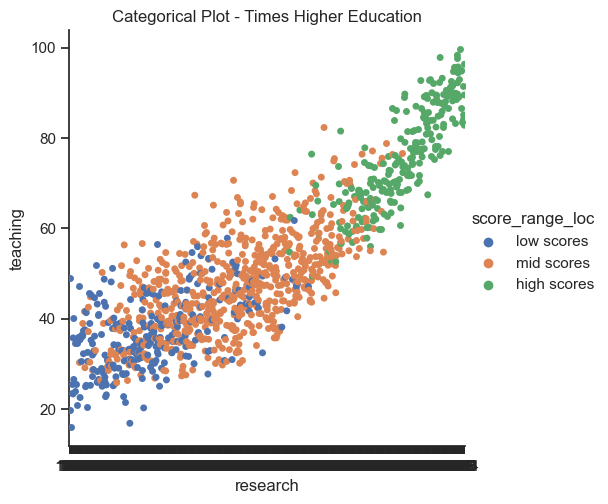

In [64]:
# Create a categorical plot in seaborn using the score categories created above

sns.set(style="ticks")
cat1 = sns.catplot(x="research", y="teaching", hue="score_range_loc", data=the_sub2).set(title='Categorical Plot - Times Higher Education')

### By grouping the scores in low, mid to high range, and plotting the teaching and research variables, we can see that clearly see that there are alot of mid range scores in the lower end of teaching and research scores, and some data points that fall towards the higher range. The high range socres though is more clear cut, with most of the teaching and research scores falling in the high end.  

In [65]:
# fig = g.get_figure()

cat1.savefig("catplot_1.png") 

### Answers to Questions

#### Are there any differences between these three rankings (e.g. in their Top 100 rankings) considering their different criteria?
     Yes there are some differences between these three rankings, in terms of the connection betweeen total scores and the    
     variables. For example, teaching scores is more predictive on the total scores for Times Higher Education, where as for
     Shanghai ranking, the research/citations were stronger predictives. On the other hand, staff winning awards were the 
     strongest connection with total university score for CWUR ranking. 

#### Which country or region have more higher ranking universities? Are there any differences between the three bodies? Do they favour more on the university in their own country/region?
     To be answered

#### Are there any relationships between education attainment and the rankings?
     To be explored and answered

#### Are there any relationship between education expenditure and the rankings?
     To be explored and aswered
     
#### Has the rankings been stable throughout the years? Are there any universities that improved a lot in terms of ranking, or decreased a lot?
     To be explored and answered
     
#### Additional questions to be explore - 
     - Why were there no values between 80 to 90s for the total scores in Shanghai ranking dataset? 
     - What would be the changes in correlation after choosing a subset of top 100 or 200 for CWUR'

### Possible Hypotheses

    1. Countries or region with higher public/private sector education expenditure haave more higher ranking universities
    2. Countries or region with higher education attainment will have more higher ranking universities
    3. The universities or countries in the top 100 ranking will be different in three bodies given their different method of
       assessing the criterias
   